<a href="https://colab.research.google.com/github/zhang8yiming/ML-DL/blob/main/L2_Homework_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 用逻辑回归识别人脸表情

## 作业内容

在本次作业中，你将用 Scikit-Learn 中的逻辑回归识别人脸表情，调整逻辑回归的参数，对比模型效果。

## Fer2013 人脸表情数据集简介

本次作业的数据集来自 Fer2013 人脸表情数据集，从35886张人脸表情图片中挑选了7千张图片，每张图片是由大小固定为48×48的灰度图像组成，共有7种表情，分别对应于数字标签0-6，
原始数据集链接：[数据集Fer2013下载地址,点我](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)

具体表情对应的标签和中英文如下：
>0 anger 生气；<br> 
1 disgust 厌恶； <br>
2 fear 恐惧；<br> 
3 happy 开心；<br> 
4 sad 伤心；<br>
5 surprised 惊讶； <br>
6 normal 中性。<br>

但是，数据集并没有直接给出图片，而是将表情、图片数据、用途的数据保存到csv文件中，如下图所示，

![在这里插入图片描述](https://img-blog.csdnimg.cn/4f7cc08520e64c68a23e3c110edf20ca.png#pic_center)

如上图所示，第一张图是csv文件的开头，第一行是表头，说明每列数据的含义，第一列表示表情标签，第二列即为图片数据，这里是原始的图片数据，最后一列为用途。
- 每行pixels下有48*48个数据，以空格进行分隔;
- emotion有0-6，分别代表以下意思：‘anger’,‘disgust’,‘fear’,‘happy’,‘neutral’,‘sad’,‘surprised’；

### 使用Pandas读取csv

In [ ]:
import numpy as np
import pandas as pd

fer2013 = pd.read_csv('fer2013_7k.csv')[['emotion', 'pixels']]
fer2013 = fer2013.sample(frac=1.0)
fer2013['pixels'] = fer2013['pixels'].apply(lambda x: np.array(x.split()).astype(int)) # 转换我 int 类型

num_of_instances = len(fer2013) # 获取数据集的数量
print("数据集的数量为：",num_of_instances)

数据集的数量为： 6999


### 使用cv2查看其中一张图片

标签是：anger


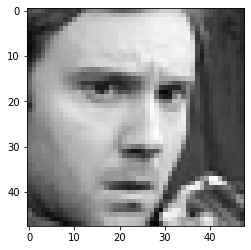

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 建立标签 index 与 标签描述的对应

emotion_label_to_text = {
    0: 'anger', 1: 'disgust', 
    2: 'fear', 3: 'happiness', 
    4: 'sadness', 5: 'surprise', 
    6: 'neutral'
}

# 随机选择第一张图片
img = fer2013['pixels'][0].reshape(48,48)
plt.imshow(img0, cmap="gray")
print('标签是：{0}'.format(emotion_label_to_text[fer2013['emotion'][0]]))

## 问题 1：完成逻辑回归的训练并进行评分

完成下列代码补全操作，具体的功能要求如下：
- 要求1：定义逻辑回归模型，solver设置为'sag'
- 要求2：在训练集上进行训练，并在测试集上进行预测
- 要求3：计算出每个类别的准确率

In [ ]:
from sklearn import linear_model

dfTrain = fer2013.iloc[:-2000] # 训练集
dfTest = fer2013.iloc[-2000:] # 测试集

y = dfTrain['emotion'].values.flatten() # 
x = np.vstack(dfTrain['pixels'].values)

# TODO 训练模型

######## your code ########
model = linear_model.LogisticRegression(solver='sag')
model.fit(x, y)
######## your code ########

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='sag')

In [ ]:
# TODO 对测试集预测

######## your code ########
y_test_pred = model.predict(np.vstack(dfTest['pixels'].values))
######## your code ########

sklearn.metrics.confusion_matrix（混淆矩阵）

```
目的：评估分类器准确性
函数：sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
输入：

    y_true:实际的目标结果
    y_pred:预测的结果
    labels: 标签，对结果中的string进行排序， 顺序对应0、1、2
    sample_weight:样本的权重
输出：
    
    一个混淆矩阵，shape=[y中的类型数，y中的类型数]
    矩阵中每个值表征分类的准确性
    第0行第0列的数表示 y_true中值为0，y_pred中值也为0的个数
    第0行第1列的数表示 y_true中值为0，y_pred中值为1的个数
    以此类推：其i-th 行和j-th 列条目表示真实标签为i-th 类且预测标签为j-th 类的样本数
```

In [ ]:
# TODO 计算每类准确率
from sklearn import metrics

######## your code ########
# 获得混淆矩阵
matrix = metrics.confusion_matrix(dfTest['emotion'].values.flatten(), y_test_pred)
# 获得每个类的准确率
matrix.diagonal() / matrix.sum(axis=1)
######## your code ########

模型的准确率是：[0.19141914 0.03225806 0.21666667 0.54330709 0.24846626 0.2706422
 0.2611465 ]


In [ ]:
matrix

array([[ 58,   0,  42,  95,  51,  21,  36],
       [  4,   1,   8,  10,   5,   0,   3],
       [ 27,   0,  65,  72,  44,  33,  59],
       [ 38,   0,  52, 276,  53,  20,  69],
       [ 40,   2,  43,  75,  81,  24,  61],
       [ 15,   0,  32,  47,  30,  59,  35],
       [ 43,   3,  40,  74,  54,  18,  82]])

## 问题2：完成逻辑回归的参数调整

完成下列代码补全操作，具体的功能要求如下：
- 要求1：尝试对 penalty 和 C 进行调整，并从新定义逻辑回归模型
- 要求2：对超参数进行搜索，搜索得到最优的超参数

**penalty** {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

> Specify the norm of the penalty:

-   `'none'`: no penalty is added;
-   `'l2'`: add a L2 penalty term and it is the default choice;
-   `'l1'`: add a L1 penalty term;
-   `'elasticnet'`: both L1 and L2 penalty terms are added.


**C** float, default=1.0

> Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [ ]:
for penalty in [ 'l2', 'none']:
    for c in [0.1, 0.2, 0.5, 1]:
        # TODO 计算每个参数的准确率
        pass

In [ ]:
for penalty in [ 'l2', 'none']:
    for c in [0.1, 0.2, 0.5, 1]:
        model = linear_model.LogisticRegression(penalty=penalty, C=c, solver='sag')
        model.fit(x, y)
        y_test_pred = model.predict(np.vstack(dfTest['pixels'].values))
        print(penalty, c, metrics.accuracy_score(dfTest['emotion'].values, y_test_pred))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


l2 0.1 0.3115


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


l2 0.2 0.312


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


l2 0.5 0.3115


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


l2 1 0.311


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


none 0.1 0.3125


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


none 0.2 0.3105


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


none 0.5 0.312
none 1 0.3105


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
